# METRO INTERSTATE TRAFFIC VOLUME

The Metro Interstate Traffic Volume dataset is a regression situation where we are trying to predict the value of a continuous variable(Traffic Volume)

Attributes :
1. holiday
2. temp 
3. rain_1h 
4. snow_1h 
5. clouds_all
6. weather_main
7. weather_description 
8. date_time 
9. traffic_volume

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# Importing the dataset
dataset = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [14]:
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [15]:
dataset.shape

(48204, 9)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [17]:
dataset.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [18]:
dataset["year"] = dataset["date_time"].map(lambda x : int(x.split(" ")[0].split("-")[0]))
dataset["month"] = dataset["date_time"].map(lambda x : int(x.split(" ")[0].split("-")[1]))
dataset["date"] = dataset["date_time"].map(lambda x : int(x.split(" ")[0].split("-")[2]))
dataset["hour"] = dataset["date_time"].map(lambda x : int(x.split(" ")[1].split(":")[0]))

dataset.drop("date_time",axis=1,inplace=True)

In [19]:
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,date,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13


# Visualisation

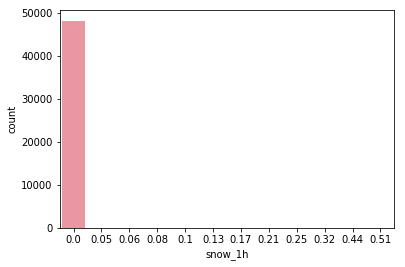

In [11]:
# Count plot for snow_1h
#Plotting snow variable indicates  most of the observations have value close to 0.0 
sns.countplot(x="snow_1h",data=dataset)

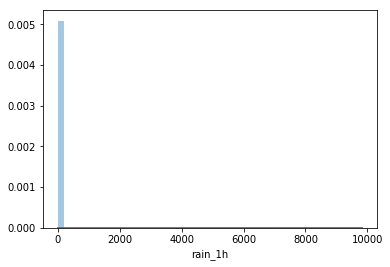

In [21]:
# Distplot for rain_1h
#Plotting rain variable indicates  most of the observations have value close to 0.0 
sns.distplot(dataset["rain_1h"])

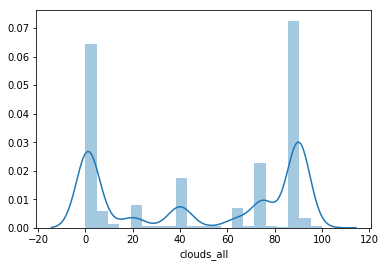

In [22]:
# Distplot for clouds_all
#clouds_all indicates the cloud coverage for the give day and hour
sns.distplot(dataset["clouds_all"])


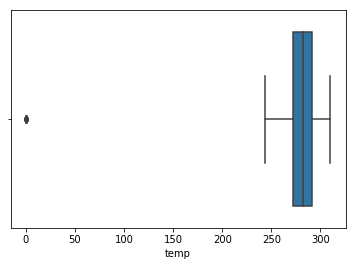

In [25]:
#Boxplot of temperature
#there is one outlier.
sns.boxplot(x="temp",data=dataset)

In [26]:
dataset.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume', 'year', 'month', 'date',
       'hour'],
      dtype='object')

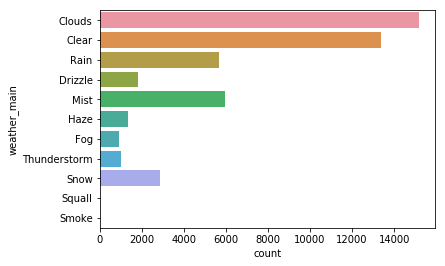

In [29]:
#countplot of weather_main
sns.countplot(y="weather_main",data=dataset)

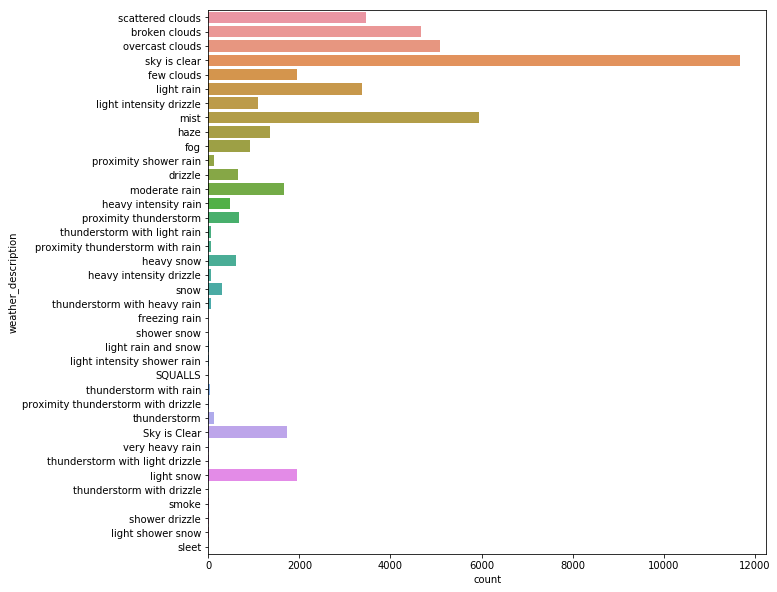

In [32]:
#countplot of weather_description
plt.figure(figsize=(10,10))
sns.countplot(y="weather_description",data=dataset)

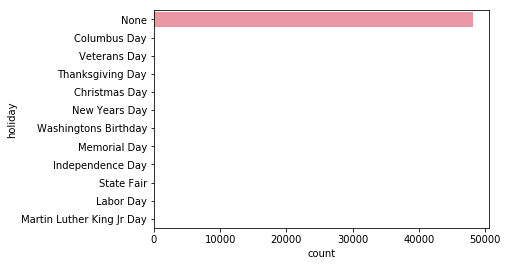

In [37]:
#countplot of holiday
sns.countplot(y="holiday",data =dataset)

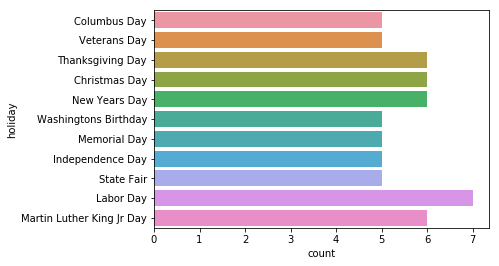

In [36]:
#After removing "None"
holiday = dataset[dataset["holiday"]!="None"]

sns.countplot(y="holiday",data =holiday)

# pairplot

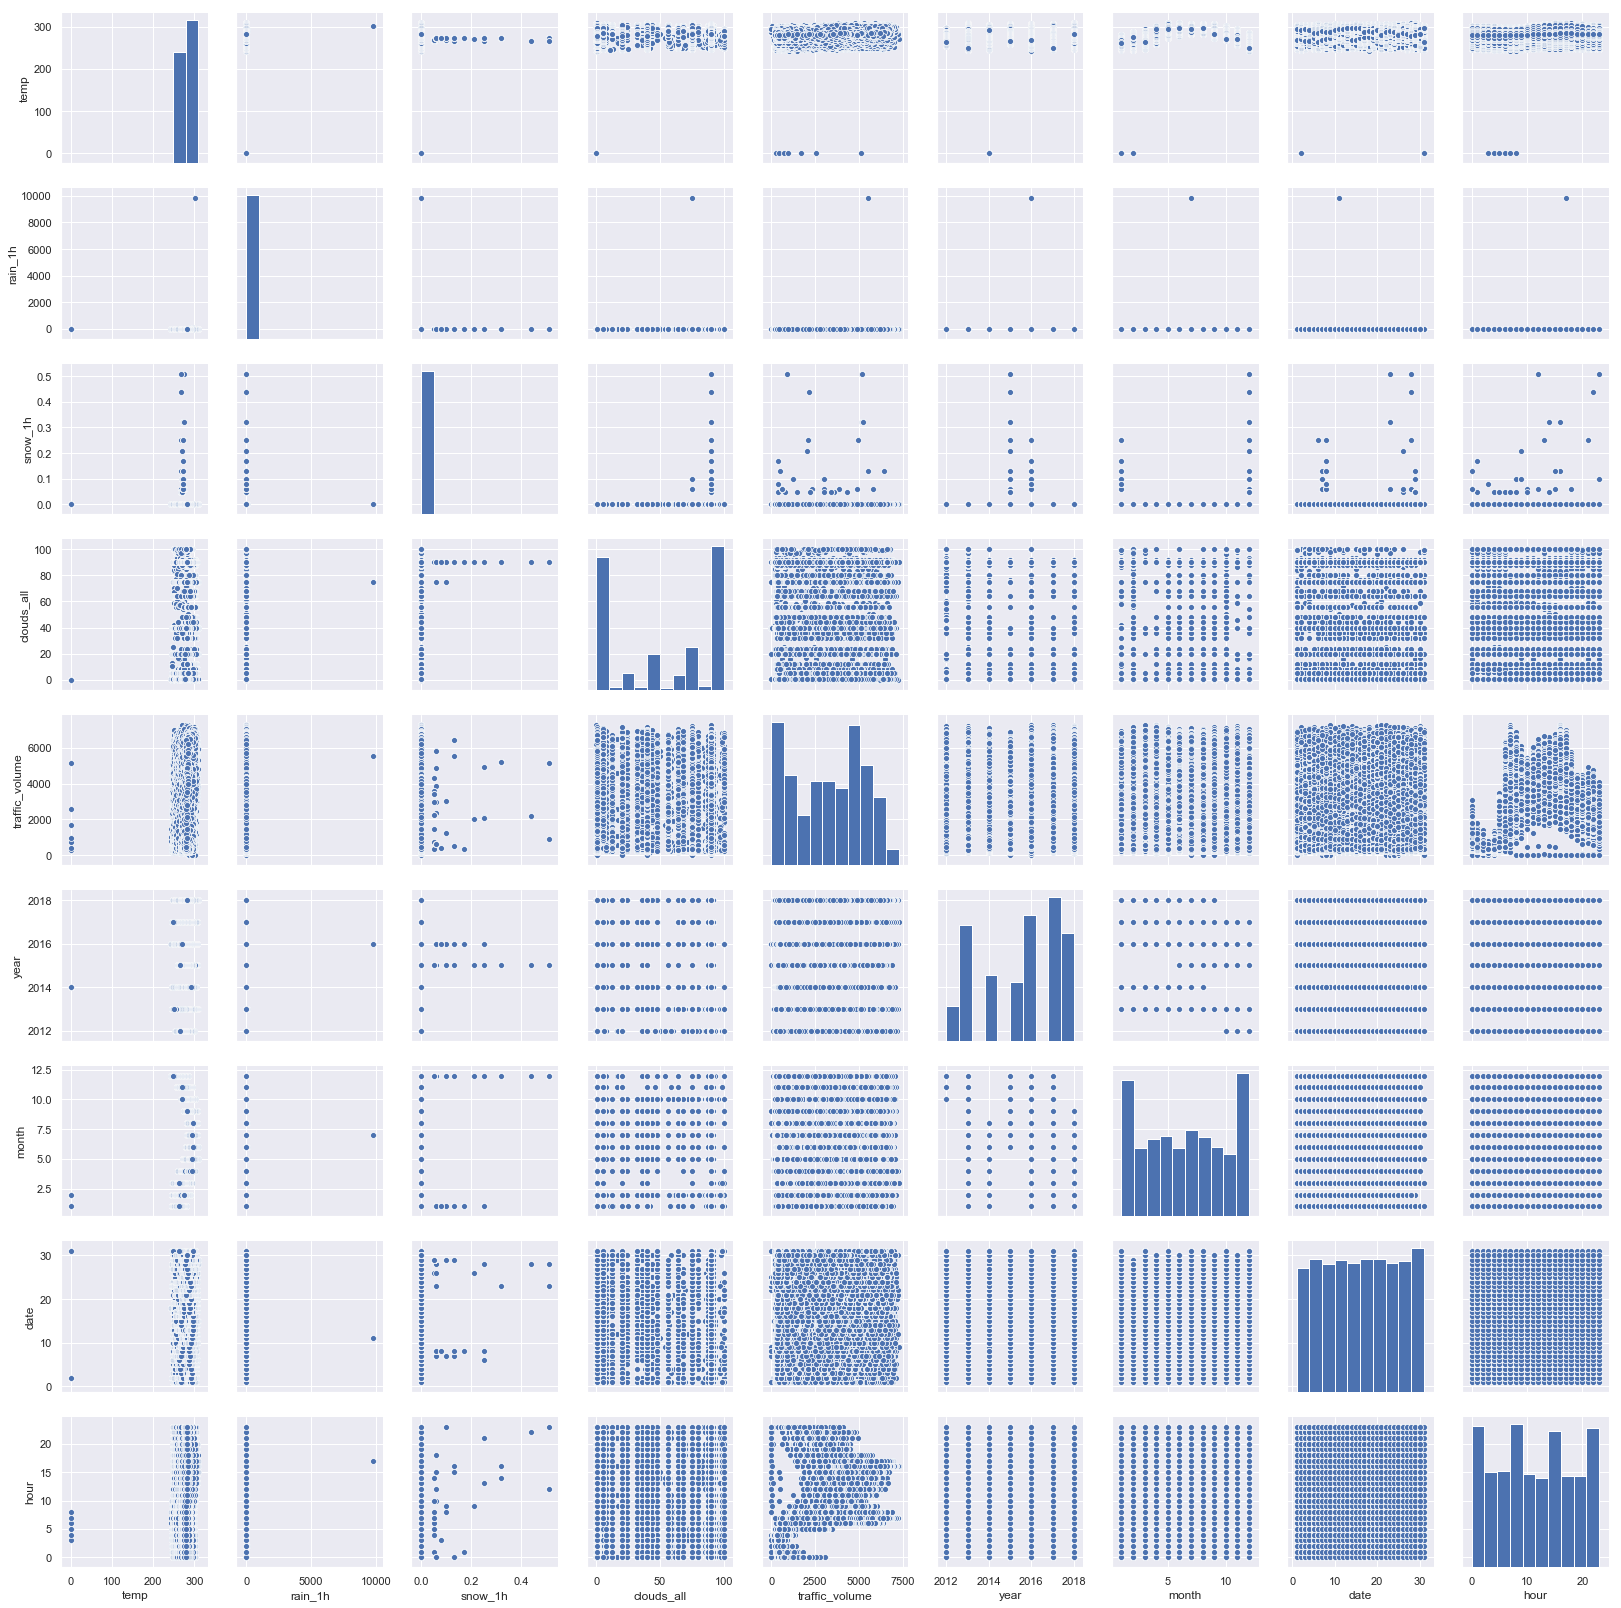

In [38]:
# pairplot
sns.set(style="darkgrid")
sns.pairplot(data=dataset)

# Heatmap

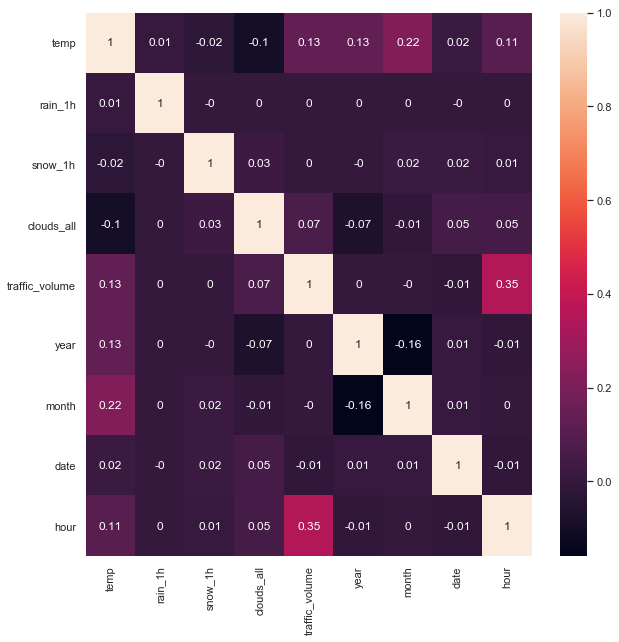

In [39]:
# Heat map 
plt.figure(figsize=(10,10))
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


# DATA PREPROCESSING

In [20]:
#ENCODING
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


dataset.iloc[:,5] = label_encoder.fit_transform(dataset.iloc[:,5])
dataset.iloc[:,6] = label_encoder.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,0] = label_encoder.fit_transform(dataset.iloc[:,0])

In [21]:
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,date,hour
0,7,288.28,0.0,0.0,40,1,24,5545,2012,10,2,9
1,7,289.36,0.0,0.0,75,1,2,4516,2012,10,2,10
2,7,289.58,0.0,0.0,90,1,19,4767,2012,10,2,11
3,7,290.13,0.0,0.0,90,1,19,5026,2012,10,2,12
4,7,291.14,0.0,0.0,75,1,2,4918,2012,10,2,13


In [22]:
# Choosing independent variable and dependent variable
x = pd.DataFrame(dataset.iloc[:,dataset.columns!="traffic_volume"])
y = dataset.iloc[:,dataset.columns=="traffic_volume"]


In [23]:
y.head()

,traffic_volume
0,5545
1,4516
2,4767
3,5026
4,4918


In [24]:
x.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,year,month,date,hour
0,7,288.28,0.0,0.0,40,1,24,2012,10,2,9
1,7,289.36,0.0,0.0,75,1,2,2012,10,2,10
2,7,289.58,0.0,0.0,90,1,19,2012,10,2,11
3,7,290.13,0.0,0.0,90,1,19,2012,10,2,12
4,7,291.14,0.0,0.0,75,1,2,2012,10,2,13


In [25]:
#Feature Selection
# backward elimination method  
# Significance level 0.05
import statsmodels.formula.api as sm

x = np.append(arr=np.ones((48204, 1)).astype(int),values=x,axis=1)




In [26]:
x_opt = x[:,:]
regressor_OLS = sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     719.7
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:57:06   Log-Likelihood:            -4.3081e+05
No. Observations:               48204   AIC:                         8.616e+05
Df Residuals:                   48192   BIC:                         8.617e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7479.3421   9279.240     -0.806      0.420   -2.57e+04    1.07e+04
x1           127.4863     59.942      2.127      0.033      10.000     244.973
x2            15.2508      0.667     22.854      0.000      13.943      16.559
x3             0.1459      0.187      0.779      0.436      -0.221       0.513
x4           110.0013   1028.493      0.107      0.915   -1905.858    2125.860
x5             3.9436      0.267     14.791      0.000       3.421       4.466
x6           -44.1315      3.518    -12.543      0.000     -51.028     -37.235
x7            -8.6004      1.007     -8.539      0.000     -10.575      -6.626
x8             2.3149      4.614      0.502      0.616      -6.728      11.358
x9           -14.3781      2.586     -5.561      0.000     -19.446      -9.310
x10           -2.3407      0.964     -2.429      0.015      -4.229      -0.452
x11           95.1453      1.226     77.609      0.000      92.742      97.548
==============================================================================
Omnibus:                    22374.258   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2755.767
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       1.884   Cond. No.                     2.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#removing 4
x_opt = x[:,[0,1,2,3,5,6,7,8,9,10,11]]
regressor_OLS = sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     791.7
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:57:11   Log-Likelihood:            -4.3081e+05
No. Observations:               48204   AIC:                         8.616e+05
Df Residuals:                   48193   BIC:                         8.617e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7481.0093   9279.132     -0.806      0.420   -2.57e+04    1.07e+04
x1           127.4881     59.941      2.127      0.033      10.003     244.973
x2            15.2491      0.667     22.858      0.000      13.942      16.557
x3             0.1459      0.187      0.779      0.436      -0.221       0.513
x4             3.9439      0.267     14.793      0.000       3.421       4.466
x5           -44.1217      3.517    -12.545      0.000     -51.015     -37.228
x6            -8.5990      1.007     -8.538      0.000     -10.573      -6.625
x7             2.3158      4.614      0.502      0.616      -6.727      11.359
x8           -14.3712      2.585     -5.560      0.000     -19.438      -9.305
x9            -2.3391      0.963     -2.428      0.015      -4.227      -0.451
x10           95.1471      1.226     77.618      0.000      92.744      97.550
==============================================================================
Omnibus:                    22377.480   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2755.873
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       1.884   Cond. No.                     2.25e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#removing 8
x_opt = x[:,[0,1,2,3,5,6,7,9,10,11]]
regressor_OLS = sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     879.6
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:57:20   Log-Likelihood:            -4.3081e+05
No. Observations:               48204   AIC:                         8.616e+05
Df Residuals:                   48194   BIC:                         8.617e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2829.1461    458.280     -6.173      0.000   -3727.381   -1930.911
x1           127.4299     59.940      2.126      0.034       9.946     244.914
x2            15.3093      0.656     23.328      0.000      14.023      16.596
x3             0.1457      0.187      0.778      0.437      -0.221       0.513
x4             3.9367      0.266     14.788      0.000       3.415       4.458
x5           -43.9754      3.505    -12.546      0.000     -50.845     -37.106
x6            -8.5446      1.001     -8.534      0.000     -10.507      -6.582
x7           -14.6276      2.534     -5.773      0.000     -19.594      -9.661
x8            -2.3320      0.963     -2.421      0.015      -4.220      -0.444
x9            95.1364      1.226     77.622      0.000      92.734      97.539
==============================================================================
Omnibus:                    22403.677   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2756.294
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       1.884   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#removing 3
x_opt = x[:,[0,1,2,5,6,7,9,10,11]]
regressor_OLS = sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

#Now every p value is less than 0.05(significance level)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     989.5
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:57:28   Log-Likelihood:            -4.3081e+05
No. Observations:               48204   AIC:                         8.616e+05
Df Residuals:                   48195   BIC:                         8.617e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2830.8510    458.273     -6.177      0.000   -3729.072   -1932.630
x1           127.4321     59.940      2.126      0.034       9.949     244.916
x2            15.3145      0.656     23.337      0.000      14.028      16.601
x3             3.9377      0.266     14.792      0.000       3.416       4.460
x4           -43.9550      3.505    -12.541      0.000     -50.825     -37.085
x5            -8.5340      1.001     -8.524      0.000     -10.496      -6.572
x6           -14.6289      2.534     -5.773      0.000     -19.596      -9.662
x7            -2.3339      0.963     -2.423      0.015      -4.222      -0.446
x8            95.1389      1.226     77.624      0.000      92.737      97.541
==============================================================================
Omnibus:                    22409.576   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2756.385
Skew:                           0.178   Prob(JB):                         0.00
Kurtosis:                       1.884   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
x_opt = pd.DataFrame(x_opt[:,1:])


In [31]:
x_opt.head()

,0,1,2,3,4,5,6,7
0,7.0,288.28,40.0,1.0,24.0,10.0,2.0,9.0
1,7.0,289.36,75.0,1.0,2.0,10.0,2.0,10.0
2,7.0,289.58,90.0,1.0,19.0,10.0,2.0,11.0
3,7.0,290.13,90.0,1.0,19.0,10.0,2.0,12.0
4,7.0,291.14,75.0,1.0,2.0,10.0,2.0,13.0


# REGRESSION

In [35]:
#Splitting the dataset into testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_opt, y, test_size = 0.25)

#    LINEAR REGRESSION

In [108]:
# SIMPLE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
y_pred = regressor.predict(x_test)



In [110]:
# Model Performance
print('Coefficients: \n', regressor.coef_)
print("intercept : ",regressor.intercept_ )

from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Coefficients: 
 [[ 1.29271648e+02  1.47371018e+01  1.53460360e-01  2.99079173e+02
   3.77518119e+00 -4.19222813e+01 -8.27450219e+00  3.09132001e+00
  -1.34667597e+01 -3.10878119e+00  9.59969750e+01]]
intercept :  [-8928.55607506]
Mean squared error: 3412308.5217204075
Variance score: 0.13677579812210205


#    Polynomial Regression

In [120]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)




In [121]:
x2 = pf.fit_transform(x_opt)



In [122]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.25)


In [123]:

LR1 = LinearRegression()
LR1.fit(xtrain,ytrain)
pred = LR1.predict(xtest)



In [124]:
# Model Performance


print("Variance score: {}".format(r2_score(ytest, pred)))
print("Mean squared error: {}".format(mean_squared_error(ytest, pred)))


Variance score: 0.6508820960874031
Mean squared error: 1382924.5302981993


# Decision Tree Regressor

In [125]:
# Decision Tree Regressor


from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()


tree.fit(x_train,y_train)

y_pred_tree = tree.predict(x_test)

# Model Performance

print("Variance score: {}".format(r2_score(y_test, y_pred_tree)))
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred_tree)))

Variance score: 0.711411480695178
Mean squared error: 1140784.817608497


# SVR

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(x_opt)

sc_y = StandardScaler()
y= sc_y.fit_transform(y.values.reshape(-1,1))



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.25)

In [39]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")


regressor.fit(Xtrain,Ytrain)

y_pred_svr = regressor.predict(Xtest)



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
# Model Performance
from sklearn.metrics import mean_squared_error, r2_score
print("Variance score: {}".format(r2_score(Ytest, y_pred_svr)))
print("Mean squared error: {}".format(mean_squared_error(Ytest, y_pred_svr)))

Variance score: 0.6512050544074249
Mean squared error: 0.34651822449491065


# Random Forest Regressor

In [126]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor 
forest =  RandomForestRegressor(n_estimators = 100)
forest.fit(x_train,y_train)

y_pred_forest = forest.predict(x_test)

# Model Performance

print("Variance score: {}".format(r2_score(y_test, y_pred_forest)))
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred_forest)))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Variance score: 0.8322951727816811
Mean squared error: 662933.9281797195


   # CONCLUSION

In [47]:
print("R2 SCORE :- \nLinear Regression     : 0.13677579812210205 \nPolynomial Regression : 0.6508820960874031 \nSVR                   : 0.6512050544074249 \nDecision Tree         : 0.711411480695178 \nRandom Forest         : 0.8322951727816811    ")

R2 SCORE :- 
Linear Regression     : 0.13677579812210205 
Polynomial Regression : 0.6508820960874031 
SVR                   : 0.6512050544074249 
Decision Tree         : 0.711411480695178 
Random Forest         : 0.8322951727816811    


The Random Forest algorithm achieved the best overall results using the training and testing datasets. For this dataset, Random Forest should be considered for further modeling.